お手本コード

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/chumajin-mlcat/udemy-pythonbeginner/blob/main/Session5/Session5.ipynb)

写経用のnotebook

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/chumajin-mlcat/udemy-pythonbeginner/blob/main/blank.ipynb)

# Session5 : 最も実務で使うpythonテクニック(その2)
* Pandasの基本を学び、excelよりも楽に処理をしていき、最後はheatmapというグラフを描くことを目的とします。

1. Pandasの基本


2. Pandasの機能を使いこなす

In [1]:
!git clone https://github.com/chumajin-mlcat/udemy-pythonbeginner.git

fatal: destination path 'udemy-pythonbeginner' already exists and is not an empty directory.


# 1.Pandasの基本

In [2]:
# 毎回書いてよい。
import pandas as pd # 表計算が得意
import numpy as np # 計算が得意
import matplotlib.pyplot as plt # グラフ表記が得意

import os # ファイル操作などが得意


In [3]:
# 復習
df = pd.read_csv("/content/udemy-pythonbeginner/Session5/sample/population.csv")
df

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,9035043.0
1,Afghanistan,AFG,1961,9214083.0
2,Afghanistan,AFG,1962,9404406.0
3,Afghanistan,AFG,1963,9604487.0
4,Afghanistan,AFG,1964,9814318.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


## 1.1 excelを読み込む

In [4]:
excelpath = "/content/udemy-pythonbeginner/Session5/sample/population.xlsx"

In [5]:
df = pd.read_excel(excelpath)
df.head(3)

,Country Name,国,年,人数
0,India,IND,2023,1438069596
1,China,CHN,2023,1410710000
2,Indonesia,IDN,2023,281190067


## 保存

In [6]:
#今このプログラミングのコードを実行している場所
os.getcwd()

'/content'

**to_csv(excel保存ならto_excel)**

In [7]:
df.to_csv("test.csv")

ファイル名だけ打つと、今/contentの下にいるので、/content/test.csv　ができる

In [8]:
df.to_csv("/content/sample_data/test.csv")

きちんと位置を指定してあげると、その場所にファイルができる

**以下が一般的**

In [9]:
df.to_csv("test.csv",index=False)

**日本語の文字化け防止(日本語のものは)**

In [10]:
df.to_csv("test.csv",index=False, encoding="shift-jis")

**Excelで保存**

In [11]:
df.to_excel("test.xlsx",index=False)

In [12]:
df

,Country Name,国,年,人数
0,India,IND,2023,1438069596
1,China,CHN,2023,1410710000
2,Indonesia,IDN,2023,281190067
3,Pakistan,PAK,2023,247504495
4,Nigeria,NGA,2023,227882945
...,...,...,...,...
216,San Marino,SMR,2023,33860
217,St. Martin (French part),MAF,2023,27515
218,Palau,PLW,2023,17727
219,Nauru,NRU,2023,11875


## 1.2 Pandasの得意技 : フィルタリング機能 →　この条件の場合だけを抜く　みたいな感じです

### 1.2.1 iloc関数 : DataFrameの行と列を番号で指定する

In [13]:
df.head(5)

,Country Name,国,年,人数
0,India,IND,2023,1438069596
1,China,CHN,2023,1410710000
2,Indonesia,IDN,2023,281190067
3,Pakistan,PAK,2023,247504495
4,Nigeria,NGA,2023,227882945


そのまま使うと行を抜く : 行を抜いているのに、縦表示（天地逆転してみえちゃう)になるのに注意。

In [14]:
df.iloc[2]

,2
Country Name,Indonesia
国,IDN
年,2023
人数,281190067


カンマ,を入れると列も指定可能

In [15]:
df.iloc[2,1] # [行、列]　を入れるとピンポイントで指定可能

'IDN'

In [16]:
df.head(3)

,Country Name,国,年,人数
0,India,IND,2023,1438069596
1,China,CHN,2023,1410710000
2,Indonesia,IDN,2023,281190067


In [17]:
# この表記を私はよく使うので、これでもOK

df["国"].iloc[2]


'IDN'

for 文で回すときもこの形でよく使う

In [18]:
for a in range(5):
    print(df["国"].iloc[a])

IND
CHN
IDN
PAK
NGA


### 1.2.2 複数の切り出し (dataframeの切り出し)

復習 : リストを複数で選択する

In [19]:
country = df["国"]
country

,国
0,IND
1,CHN
2,IDN
3,PAK
4,NGA
...,...
216,SMR
217,MAF
218,PLW
219,NRU


In [20]:
country[3:10]

,国
3,PAK
4,NGA
5,BRA
6,BGD
7,RUS
8,MEX
9,ETH


In [21]:
country[0:5]

,国
0,IND
1,CHN
2,IDN
3,PAK
4,NGA


In [22]:
country[:5]


,国
0,IND
1,CHN
2,IDN
3,PAK
4,NGA


In [23]:
country[55:]

,国
55,NER
56,MLI
57,SYR
58,BFA
59,LKA
...,...
216,SMR
217,MAF
218,PLW
219,NRU


In [24]:
country[:]

,国
0,IND
1,CHN
2,IDN
3,PAK
4,NGA
...,...
216,SMR
217,MAF
218,PLW
219,NRU


## 1.3 DataFrameの場合

これが行と列で２つあると考える
**ちなみに、行(rowとか、indexとか英語で言う)は漢字で横に2本入っているので、横方向**


**列(column)は漢字で縦に2本入っているので、縦方向です。**

In [25]:
df.head(3)

,Country Name,国,年,人数
0,India,IND,2023,1438069596
1,China,CHN,2023,1410710000
2,Indonesia,IDN,2023,281190067


国、年を切り出したいときは

In [26]:
df2 = df.iloc[:,1:3] # 行が最初から最後まで全部、列が1～2
df2.head(3)

,国,年
0,IND,2023
1,CHN,2023
2,IDN,2023


国以降を切り出したいときは

In [27]:
df2 = df.iloc[:,1:] # 最後は省略可能
df2.head(3)

,国,年,人数
0,IND,2023,1438069596
1,CHN,2023,1410710000
2,IDN,2023,281190067


行でも同じ。id 55以降を切り出したいときも同じ

In [28]:
df.head(3)

,Country Name,国,年,人数
0,India,IND,2023,1438069596
1,China,CHN,2023,1410710000
2,Indonesia,IDN,2023,281190067


In [29]:
df3 = df.iloc[55:,:]
df3

,Country Name,国,年,人数
55,Niger,NER,2023,26159867
56,Mali,MLI,2023,23769127
57,Syrian Arab Republic,SYR,2023,23594623
58,Burkina Faso,BFA,2023,23025776
59,Sri Lanka,LKA,2023,22037000
...,...,...,...,...
216,San Marino,SMR,2023,33860
217,St. Martin (French part),MAF,2023,27515
218,Palau,PLW,2023,17727
219,Nauru,NRU,2023,11875


## 1.4 Columnのフィルタリング(抽出)

<span style="font-size: 150%; color: blue;">**先にまとめを言ってみます**</span>

**df[ ] の[ ]の中に**

**1) Column名のlistを入れるとそのlistを抽出してくれるし、**

**2) True/Falseのリストを入れるとTrueのところだけ抽出してくれる。**

In [30]:
df.head(3)

,Country Name,国,年,人数
0,India,IND,2023,1438069596
1,China,CHN,2023,1410710000
2,Indonesia,IDN,2023,281190067


In [31]:
cols = df.columns
cols

Index(['Country Name', '国', '年', '人数'], dtype='object')

In [32]:
cols[1:]

Index(['国', '年', '人数'], dtype='object')

In [33]:
df4 = df[["国","人数"]] # 2重[]で抜ける
df4.head(3)

,国,人数
0,IND,1438069596
1,CHN,1410710000
2,IDN,281190067


Pythonでわかりにくい表現が出てきたときは中身を抜き出すことが重要

In [34]:
cols = ["国","人数"] # ここだけみるとcolsというリスト
df5= df[cols]
df5.head(3)

,国,人数
0,IND,1438069596
1,CHN,1410710000
2,IDN,281190067


## 1.5 True/Falseのうまい使い方。
DataFrameにはTrueのところを残して、Falseを消すという性質がある

In [35]:
df = pd.read_csv("/content/udemy-pythonbeginner/Session5/sample/population.csv")
df

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,9035043.0
1,Afghanistan,AFG,1961,9214083.0
2,Afghanistan,AFG,1962,9404406.0
3,Afghanistan,AFG,1963,9604487.0
4,Afghanistan,AFG,1964,9814318.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


Yearが1963年のところだけ抜く

In [36]:
d2 = df[df["Year"]==1963]
d2

,Country Name,Country Code,Year,Value
3,Afghanistan,AFG,1963,9.604487e+06
67,Africa Eastern and Southern,AFE,1963,1.409455e+08
131,Africa Western and Central,AFW,1963,1.040892e+08
195,Albania,ALB,1963,1.762621e+06
259,Algeria,DZA,1963,1.198212e+07
...,...,...,...,...
16579,Virgin Islands (U.S.),VIR,1963,3.980000e+04
16677,World,WLD,1963,3.184063e+09
16741,"Yemen, Rep.",YEM,1963,5.911135e+06
16805,Zambia,ZMB,1963,3.465907e+06


中身確認

In [37]:
df

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,9035043.0
1,Afghanistan,AFG,1961,9214083.0
2,Afghanistan,AFG,1962,9404406.0
3,Afghanistan,AFG,1963,9604487.0
4,Afghanistan,AFG,1964,9814318.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


In [38]:
df["Year"]==1963

,Year
0,False
1,False
2,False
3,True
4,False
...,...
16925,False
16926,False
16927,False
16928,False


**↑はListに条件式かけるとTrueとFalseのリスト(当てはまるか、当てはまらないか)で返してくれる**

In [39]:
tmp = df["Year"]==1963
tmp[:5]

,Year
0,False
1,False
2,False
3,True
4,False


In [40]:
# もう少しわかりやすく見てみると

tmp = df["Year"]==1963
d2 = df[df["Year"]==1963]
d2 = df[tmp]

In [41]:
d2

,Country Name,Country Code,Year,Value
3,Afghanistan,AFG,1963,9.604487e+06
67,Africa Eastern and Southern,AFE,1963,1.409455e+08
131,Africa Western and Central,AFW,1963,1.040892e+08
195,Albania,ALB,1963,1.762621e+06
259,Algeria,DZA,1963,1.198212e+07
...,...,...,...,...
16579,Virgin Islands (U.S.),VIR,1963,3.980000e+04
16677,World,WLD,1963,3.184063e+09
16741,"Yemen, Rep.",YEM,1963,5.911135e+06
16805,Zambia,ZMB,1963,3.465907e+06


<span style="font-size: 150%; color: blue;">**まとめ**</span>

**df[] の[]の中に**

**1) Column名のlistを入れるとそのlistを抽出してくれるし、**

**2) True/Falseのリストを入れるとTrueのところだけ抽出してくれる。**

In [42]:
df["Year"]==1963

,Year
0,False
1,False
2,False
3,True
4,False
...,...
16925,False
16926,False
16927,False
16928,False


# 2.pandasの機能を使いこなす

## 2.1 dataframeの結合

In [43]:
df = pd.read_csv("/content/udemy-pythonbeginner/Session5/sample/00000.csv",encoding="shift-jis")
df

,日付,時間,測定回数,装置id,温度,湿度,light(ルクス),電圧
0,2004-02-28,00:58:46.002832,2,19,19.7336,37.0933,71.76,2.69964
1,2004-02-28,00:58:46.171824,2,25,19.6160,37.5737,97.52,2.69964
2,2004-02-28,00:58:46.206631,2,24,19.7728,37.1620,143.52,2.71196
3,2004-02-28,00:58:46.497331,2,3,20.2040,36.8871,50.60,2.69964
4,2004-02-28,00:58:46.657464,2,6,20.4196,36.6118,121.44,2.65143
...,...,...,...,...,...,...,...,...
83172,2004-02-28,23:59:52.683779,2764,50,16.5388,45.7366,0.46,2.65143
83173,2004-02-28,23:59:53.022571,2764,23,18.9300,39.6878,0.92,2.67532
83174,2004-02-28,23:59:53.022729,2764,51,17.9500,41.9147,0.46,2.66332
83175,2004-02-28,23:59:54.094034,2764,39,19.2730,40.5004,150.88,2.68742


In [44]:
df2 = pd.read_csv("/content/udemy-pythonbeginner/Session5/sample/00001.csv",encoding="shift-jis")
df2

,日付,時間,測定回数,装置id,温度,湿度,light(ルクス),電圧
0,2004-02-29,00:00:18.162188,2765,33,19.1456,39.4842,97.52,2.68742
1,2004-02-29,00:00:18.1993,2765,21,18.8908,39.6200,3.68,2.67532
2,2004-02-29,00:00:18.199548,2765,4,19.8904,38.9401,97.52,2.65143
3,2004-02-29,00:00:18.229236,2765,53,17.1268,44.9121,0.46,2.65143
4,2004-02-29,00:00:18.407703,2765,19,18.9104,39.7557,0.46,2.67532
...,...,...,...,...,...,...,...,...
91644,2004-02-29,23:59:57.408357,5644,19,18.5968,42.9856,41.40,2.65143
91645,2004-02-29,23:59:57.626854,5644,45,17.1464,46.0655,0.92,2.65143
91646,2004-02-29,23:59:57.890821,5644,12,17.7442,45.4402,0.46,2.65143
91647,2004-02-29,23:59:59.546836,5644,41,17.6364,45.7037,45.08,2.62796


In [45]:
df_all = pd.concat([df,df2])
df_all

,日付,時間,測定回数,装置id,温度,湿度,light(ルクス),電圧
0,2004-02-28,00:58:46.002832,2,19,19.7336,37.0933,71.76,2.69964
1,2004-02-28,00:58:46.171824,2,25,19.6160,37.5737,97.52,2.69964
2,2004-02-28,00:58:46.206631,2,24,19.7728,37.1620,143.52,2.71196
3,2004-02-28,00:58:46.497331,2,3,20.2040,36.8871,50.60,2.69964
4,2004-02-28,00:58:46.657464,2,6,20.4196,36.6118,121.44,2.65143
...,...,...,...,...,...,...,...,...
91644,2004-02-29,23:59:57.408357,5644,19,18.5968,42.9856,41.40,2.65143
91645,2004-02-29,23:59:57.626854,5644,45,17.1464,46.0655,0.92,2.65143
91646,2004-02-29,23:59:57.890821,5644,12,17.7442,45.4402,0.46,2.65143
91647,2004-02-29,23:59:59.546836,5644,41,17.6364,45.7037,45.08,2.62796


In [46]:
df_all = pd.concat([df,df2]).reset_index(drop=True) # dataframeのリストをconcatする
df_all

,日付,時間,測定回数,装置id,温度,湿度,light(ルクス),電圧
0,2004-02-28,00:58:46.002832,2,19,19.7336,37.0933,71.76,2.69964
1,2004-02-28,00:58:46.171824,2,25,19.6160,37.5737,97.52,2.69964
2,2004-02-28,00:58:46.206631,2,24,19.7728,37.1620,143.52,2.71196
3,2004-02-28,00:58:46.497331,2,3,20.2040,36.8871,50.60,2.69964
4,2004-02-28,00:58:46.657464,2,6,20.4196,36.6118,121.44,2.65143
...,...,...,...,...,...,...,...,...
174821,2004-02-29,23:59:57.408357,5644,19,18.5968,42.9856,41.40,2.65143
174822,2004-02-29,23:59:57.626854,5644,45,17.1464,46.0655,0.92,2.65143
174823,2004-02-29,23:59:57.890821,5644,12,17.7442,45.4402,0.46,2.65143
174824,2004-02-29,23:59:59.546836,5644,41,17.6364,45.7037,45.08,2.62796


In [47]:
## 補足でSession4にあるsampleを全部繋げる方法を紹介.
## 今の自分だったら、こうするのですが、余裕がある人は丸暗記してもいいかもです。

import glob # ファイルのパスを得るライブラリ. os.listdirでもいいが、実はこっちのほうが楽。

filepathes = glob.glob("/content/udemy-pythonbeginner/Session4/sample/*.csv") # globを使うとワイルドカード*が使える.この場合、csvファイルを全部抜くという意味

filepathes.sort() # listをあいうえお順に。00000.csv, 00001.csv, 00002.csvの順番にリストを並び替えている
print(filepathes)

alldf = [] # 空のリスト

for path in filepathes:
  df = pd.read_csv(path,encoding="shift-jis")
  alldf.append(df) # リストにdataframeを追加

alldf = pd.concat(alldf,ignore_index=True) # alldfは、dataframeのリスト。ignore_indexでindexを上から順に降ってきれいに。reset_indexと同じ。
alldf

['/content/udemy-pythonbeginner/Session4/sample/00000.csv', '/content/udemy-pythonbeginner/Session4/sample/00001.csv', '/content/udemy-pythonbeginner/Session4/sample/00002.csv', '/content/udemy-pythonbeginner/Session4/sample/00003.csv', '/content/udemy-pythonbeginner/Session4/sample/00004.csv', '/content/udemy-pythonbeginner/Session4/sample/00005.csv']


,日付,時間,測定回数,装置id,温度,湿度,light(ルクス),電圧
0,2004-02-28,00:58:46.002832,2,19,19.7336,37.0933,71.76,2.69964
1,2004-02-28,00:58:46.171824,2,25,19.6160,37.5737,97.52,2.69964
2,2004-02-28,00:58:46.206631,2,24,19.7728,37.1620,143.52,2.71196
3,2004-02-28,00:58:46.497331,2,3,20.2040,36.8871,50.60,2.69964
4,2004-02-28,00:58:46.657464,2,6,20.4196,36.6118,121.44,2.65143
...,...,...,...,...,...,...,...,...
525948,2004-03-04,23:59:36.210669,17163,47,19.6748,41.1751,108.56,2.62796
525949,2004-03-04,23:59:36.39034,17163,25,20.6352,37.9161,86.48,2.63964
525950,2004-03-04,23:59:59.380507,17164,43,20.6156,38.0529,441.60,2.62796
525951,2004-03-04,23:59:59.555249,17164,20,19.9982,40.2299,23.00,2.63964


横方向にくっつける場合はaxis=1を使う

In [48]:
df

,日付,時間,測定回数,装置id,温度,湿度,light(ルクス),電圧
0,2004-03-04,00:00:00.154051,14284,43,19.5376,38.7698,28.52,2.62796
1,2004-03-04,00:00:00.265616,14284,47,18.8614,41.3771,0.46,2.62796
2,2004-03-04,00:00:00.928346,14284,49,18.1656,41.5116,0.46,2.60491
3,2004-03-04,00:00:01.548485,14284,52,18.0480,43.4191,0.92,2.60491
4,2004-03-04,00:00:01.703828,14284,40,19.9884,38.2239,121.44,2.63964
...,...,...,...,...,...,...,...,...
85952,2004-03-04,23:59:36.210669,17163,47,19.6748,41.1751,108.56,2.62796
85953,2004-03-04,23:59:36.39034,17163,25,20.6352,37.9161,86.48,2.63964
85954,2004-03-04,23:59:59.380507,17164,43,20.6156,38.0529,441.60,2.62796
85955,2004-03-04,23:59:59.555249,17164,20,19.9982,40.2299,23.00,2.63964


In [49]:
df3 = pd.read_csv("/content/udemy-pythonbeginner/Session5/sample/00000_sochiid.csv")
df3

,date,time,num,id,temperature,humid,light,voltage
0,2004-02-28,00:58:46.002832,2,SunnyBreeze,19.7336,37.0933,71.76,2.69964
1,2004-02-28,00:58:46.171824,2,ForestEcho,19.6160,37.5737,97.52,2.69964
2,2004-02-28,00:58:46.206631,2,HanaSaku,19.7728,37.1620,143.52,2.71196
3,2004-02-28,00:58:46.497331,2,NightOwl,20.2040,36.8871,50.60,2.69964
4,2004-02-28,00:58:46.657464,2,MizuTama,20.4196,36.6118,121.44,2.65143
...,...,...,...,...,...,...,...,...
83172,2004-02-28,23:59:52.683779,2764,NijiIro,16.5388,45.7366,0.46,2.65143
83173,2004-02-28,23:59:53.022571,2764,SakuraDrop,18.9300,39.6878,0.92,2.67532
83174,2004-02-28,23:59:53.022729,2764,GreenGrove,17.9500,41.9147,0.46,2.66332
83175,2004-02-28,23:59:54.094034,2764,PyroLight,19.2730,40.5004,150.88,2.68742


In [50]:
df3 = df3[["id"]]
df3

,id
0,SunnyBreeze
1,ForestEcho
2,HanaSaku
3,NightOwl
4,MizuTama
...,...
83172,NijiIro
83173,SakuraDrop
83174,GreenGrove
83175,PyroLight


dfとdf3を横方向にくっつける

In [51]:
df_all2 = pd.concat([df,df3],axis=1)
df_all2

,日付,時間,測定回数,装置id,温度,湿度,light(ルクス),電圧,id
0,2004-03-04,00:00:00.154051,14284,43,19.5376,38.7698,28.52,2.62796,SunnyBreeze
1,2004-03-04,00:00:00.265616,14284,47,18.8614,41.3771,0.46,2.62796,ForestEcho
2,2004-03-04,00:00:00.928346,14284,49,18.1656,41.5116,0.46,2.60491,HanaSaku
3,2004-03-04,00:00:01.548485,14284,52,18.0480,43.4191,0.92,2.60491,NightOwl
4,2004-03-04,00:00:01.703828,14284,40,19.9884,38.2239,121.44,2.63964,MizuTama
...,...,...,...,...,...,...,...,...,...
85952,2004-03-04,23:59:36.210669,17163,47,19.6748,41.1751,108.56,2.62796,NaN
85953,2004-03-04,23:59:36.39034,17163,25,20.6352,37.9161,86.48,2.63964,NaN
85954,2004-03-04,23:59:59.380507,17164,43,20.6156,38.0529,441.60,2.62796,NaN
85955,2004-03-04,23:59:59.555249,17164,20,19.9982,40.2299,23.00,2.63964,NaN


## 2.2 groupby ～ごとに処理する

In [52]:
df = pd.read_csv("/content/udemy-pythonbeginner/Session5/sample/population.csv")
df

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,9035043.0
1,Afghanistan,AFG,1961,9214083.0
2,Afghanistan,AFG,1962,9404406.0
3,Afghanistan,AFG,1963,9604487.0
4,Afghanistan,AFG,1964,9814318.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


このファイルの年ごとのValueの平均値を出す

In [53]:
# 参考までに以下を行うと、Year全部の平均が出ました
df["Year"].mean()

1991.5301240401654

In [54]:
# ↑のdf["Year"]をdf.groupby("Year")に変えると、Yearごと　という意味に変わります
df.groupby("Year")["Value"].mean()

,Value
Year,
1960,1.154482e+08
1961,1.170540e+08
1962,1.192163e+08
1963,1.218881e+08
1964,1.245838e+08
...,...
2019,3.156088e+08
2020,3.192044e+08
2021,3.223554e+08


reset_index()を使うと、通常のdataframeと同じように扱える

In [55]:
df2 = df.groupby("Year")["Value"].mean().reset_index()
df2

,Year,Value
0,1960,1.154482e+08
1,1961,1.170540e+08
2,1962,1.192163e+08
3,1963,1.218881e+08
4,1964,1.245838e+08
...,...,...
59,2019,3.156088e+08
60,2020,3.192044e+08
61,2021,3.223554e+08
62,2022,3.255244e+08


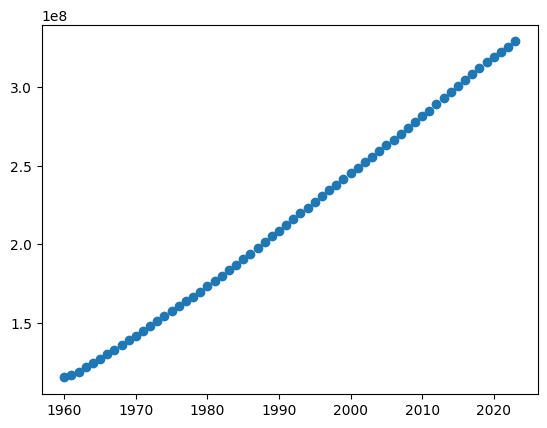

In [56]:
plt.scatter(df2["Year"],df2["Value"])

### 2.2.1 少し便利な方法

In [57]:
df

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,9035043.0
1,Afghanistan,AFG,1961,9214083.0
2,Afghanistan,AFG,1962,9404406.0
3,Afghanistan,AFG,1963,9604487.0
4,Afghanistan,AFG,1964,9814318.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


In [58]:
for a in range(5):
  print(a)
  break # breakはfor文を抜ける。この場合、最初の1回だけ実行して終了

0


In [59]:
for a,b in df.groupby("Year"):
  print(a)
  print(b)
  break # breakはfor文を抜ける。この場合、最初の1回だけ実行して終了

1960
                      Country Name Country Code  Year         Value
0                      Afghanistan          AFG  1960  9.035043e+06
64     Africa Eastern and Southern          AFE  1960  1.300721e+08
128     Africa Western and Central          AFW  1960  9.763092e+07
192                        Albania          ALB  1960  1.608800e+06
256                        Algeria          DZA  1960  1.142492e+07
...                            ...          ...   ...           ...
16576        Virgin Islands (U.S.)          VIR  1960  3.250000e+04
16674                        World          WLD  1960  3.021529e+09
16738                  Yemen, Rep.          YEM  1960  5.532301e+06
16802                       Zambia          ZMB  1960  3.153729e+06
16866                     Zimbabwe          ZWE  1960  3.809389e+06

[264 rows x 4 columns]


In [60]:
a

1960

In [61]:
b

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,9.035043e+06
64,Africa Eastern and Southern,AFE,1960,1.300721e+08
128,Africa Western and Central,AFW,1960,9.763092e+07
192,Albania,ALB,1960,1.608800e+06
256,Algeria,DZA,1960,1.142492e+07
...,...,...,...,...
16576,Virgin Islands (U.S.),VIR,1960,3.250000e+04
16674,World,WLD,1960,3.021529e+09
16738,"Yemen, Rep.",YEM,1960,5.532301e+06
16802,Zambia,ZMB,1960,3.153729e+06


f文字列を利用して、年ごとのdataframeを保存していく

### 2.2.2 f文字列 : 変数を文字列に組み込める

In [62]:
a

1960

In [63]:
f"{a}年"

'1960年'

In [64]:
a = 1961

In [65]:
f"{a}年"

'1961年'

### 2.2.3 フォルダ作成

In [66]:
os.makedirs("year",exist_ok=True)

### 2.2.3 年ごとのdataframeに分離して保存する

まずは1つで試してみる

In [67]:
a = 1960

In [68]:
f"year/{a}年.csv"

'year/1960年.csv'

In [69]:
for a,b in df.groupby("Year"):
  b.to_csv(f"year/{a}年.csv",index=False)
  break # breakはfor文を抜ける。この場合、最初の1回だけ実行して終了

In [70]:
for a,b in df.groupby("Year"):
  b.to_csv(f"year/{a}年.csv",index=False)


【演習】 Country Nameごとにファイルを保存してみましょう

In [71]:
os.makedirs("Country",exist_ok=True)

In [72]:
for a,b in df.groupby("Country Name"):
  b.to_csv(f"Country/{a}.csv",index=False)
  break

In [73]:
for a,b in df.groupby("Country Name"):
  b.to_csv(f"Country/{a}.csv",index=False)

## 2.3 Merge : 予備情報や追加情報を突き合わせして一致しているところを自動判定してくっつける

In [74]:
df

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,9035043.0
1,Afghanistan,AFG,1961,9214083.0
2,Afghanistan,AFG,1962,9404406.0
3,Afghanistan,AFG,1963,9604487.0
4,Afghanistan,AFG,1964,9814318.0
...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0
16926,Zimbabwe,ZWE,2020,15526888.0
16927,Zimbabwe,ZWE,2021,15797210.0
16928,Zimbabwe,ZWE,2022,16069056.0


In [75]:
area = pd.read_csv("/content/udemy-pythonbeginner/Session5/sample/area.csv")
area

,Country Name,Area
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Andorra,Europe
...,...,...
212,Virgin Islands (U.S.),North America
213,West Bank and Gaza,Asia
214,"Yemen, Rep.",Asia
215,Zambia,Africa


Country Nameごとに、地域情報が追加されている。これをdfに反映したい。

In [76]:
df = pd.merge(df,area,on="Country Name",how="left")

In [77]:
df

,Country Name,Country Code,Year,Value,Area
0,Afghanistan,AFG,1960,9035043.0,Asia
1,Afghanistan,AFG,1961,9214083.0,Asia
2,Afghanistan,AFG,1962,9404406.0,Asia
3,Afghanistan,AFG,1963,9604487.0,Asia
4,Afghanistan,AFG,1964,9814318.0,Asia
...,...,...,...,...,...
16925,Zimbabwe,ZWE,2019,15271368.0,Africa
16926,Zimbabwe,ZWE,2020,15526888.0,Africa
16927,Zimbabwe,ZWE,2021,15797210.0,Africa
16928,Zimbabwe,ZWE,2022,16069056.0,Africa


In [78]:
df[df["Country Name"]=="World"]

,Country Name,Country Code,Year,Value,Area
16674,World,WLD,1960,3.021529e+09,NaN
16675,World,WLD,1961,3.062769e+09,NaN
16676,World,WLD,1962,3.117373e+09,NaN
16677,World,WLD,1963,3.184063e+09,NaN
16678,World,WLD,1964,3.251253e+09,NaN
...,...,...,...,...,...
16733,World,WLD,2019,7.776892e+09,NaN
16734,World,WLD,2020,7.856139e+09,NaN
16735,World,WLD,2021,7.921184e+09,NaN
16736,World,WLD,2022,7.989982e+09,NaN


補助情報にデータがなかったWorldは、AreaはNaN (データなし)となっているのに、注意

## 2.4 pivot + heatmap : 等高線を簡単に描く

In [79]:
# 情報が多すぎるので、国を限定します
cols = ['Ireland',
 'Lebanon',
 'Bosnia and Herzegovina',
 'Turkmenistan',
 'Georgia',
 'Paraguay',
 'Nicaragua',
 'Croatia',
 'Norway',
 'Kyrgyz Republic']

In [80]:
# isin(list) だと、このlistの中にあるものというので、抜いてくれます
df2 = df[df["Country Name"].isin(cols)].reset_index(drop=True)
df2

,Country Name,Country Code,Year,Value,Area
0,Bosnia and Herzegovina,BIH,1960,3281381.0,Europe
1,Bosnia and Herzegovina,BIH,1961,3348035.0,Europe
2,Bosnia and Herzegovina,BIH,1962,3407532.0,Europe
3,Bosnia and Herzegovina,BIH,1963,3461942.0,Europe
4,Bosnia and Herzegovina,BIH,1964,3513441.0,Europe
...,...,...,...,...,...
635,Turkmenistan,TKM,2019,6803944.0,Asia
636,Turkmenistan,TKM,2020,6949912.0,Asia
637,Turkmenistan,TKM,2021,7092043.0,Asia
638,Turkmenistan,TKM,2022,7230193.0,Asia


In [81]:
df_pivot = pd.pivot_table(df2,index="Year",columns="Country Name",values="Value")
df_pivot

Country Name,Bosnia and Herzegovina,Croatia,Georgia,Ireland,Kyrgyz Republic,Lebanon,Nicaragua,Norway,Paraguay,Turkmenistan
Year,,,,,,,,,,
1960,3281381.0,4140181.0,3645600.0,2828600.0,2172300.0,1794406.0,1782370.0,3581239.0,1883514.0,1643457.0
1961,3348035.0,4167292.0,3703600.0,2824400.0,2255900.0,1850084.0,1836451.0,3609800.0,1927394.0,1695400.0
1962,3407532.0,4196712.0,3760300.0,2836050.0,2333400.0,1909578.0,1892320.0,3638918.0,1973130.0,1749214.0
1963,3461942.0,4225675.0,3816100.0,2852650.0,2413700.0,1970316.0,1950159.0,3666537.0,2021909.0,1804272.0
1964,3513441.0,4252876.0,3870300.0,2866550.0,2495300.0,2030543.0,2010176.0,3694339.0,2073119.0,1859997.0
...,...,...,...,...,...,...,...,...,...,...
2019,3345533.0,3949390.0,3720161.0,4934340.0,6590211.0,5794594.0,6483657.0,5347896.0,6515058.0,6803944.0
2020,3299349.0,3914206.0,3722716.0,4985382.0,6726595.5,5702398.0,6565267.0,5379475.0,6603739.0,6949912.0
2021,3244907.0,3878981.0,3708610.0,5033164.0,6851224.0,5718122.0,6644741.0,5408320.0,6684182.0,7092043.0


In [82]:
import seaborn as sns

<Axes: xlabel='Country Name', ylabel='Year'>

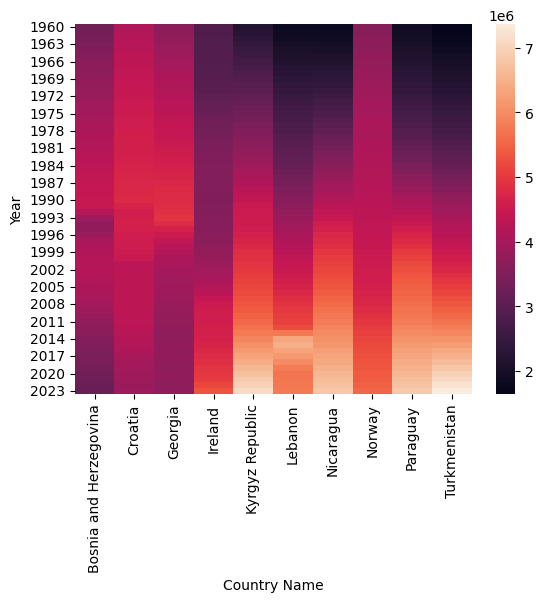

In [83]:
sns.heatmap(df_pivot)

ちょっと見ずらいので、色合いを変えてみる(玄人は正規化してみましょう)

<Axes: xlabel='Country Name', ylabel='Year'>

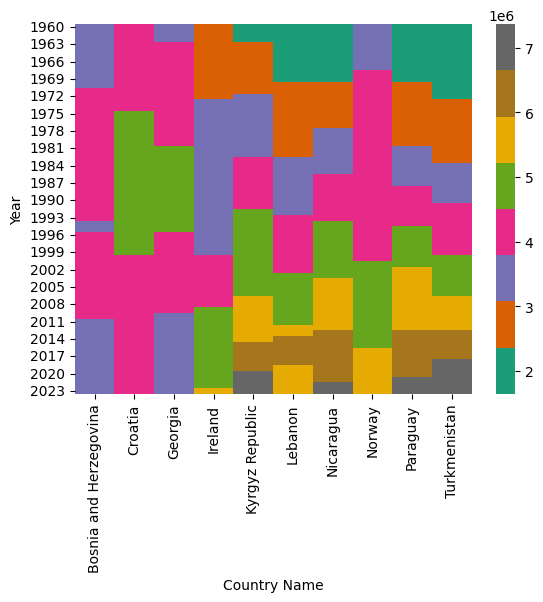

In [84]:
sns.heatmap(df_pivot,cmap='Dark2')